**LATIHAN Linier Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
#membuat data dummy

#data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])

house_price = np.array([15000,18000,27000,34000, 50000,68000,65000,81000,85000,90000])


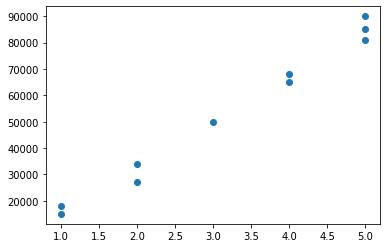

In [53]:
#menampilkan scatter plot dari dataset
plt.scatter(bedrooms, house_price)

In [54]:
#import library linear regression
from sklearn.linear_model import LinearRegression

#melatih model dengan algoritma
bedrooms = bedrooms.reshape(-1,1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

LinearRegression()

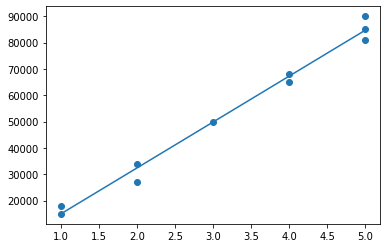

In [55]:
#visualisasi hubungan antara jumlah kamar dengan harga kamar
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

**LATIHAN Logistic Regression**

In [56]:
import pandas as pd

In [57]:
#load data set
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


In [59]:
df = pd.read_csv('Social_Network_Ads (1).csv',sep=",")
df.head(12)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [60]:
df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [62]:
#drop/delete kolom yang tidak diperlukan
data = df.drop(columns=['User ID'])

In [63]:
#menjalankan proses one-hot encoding dengan get_dummies
data = pd.get_dummies(data)

data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [64]:
#pisahkan atribut label
predictions = ['Age','EstimatedSalary','Gender_Female','Gender_Male',]

x =  data[predictions]
y = data['Purchased']

In [72]:
#melakukan normalisasi terhadap data yang kita  miliki
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)
scaled_data = pd.DataFrame(scaled_data, columns= x.columns)
scaled_data

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204
...,...,...,...,...
395,0.797057,-0.844019,0.980196,-0.980196
396,1.274623,-1.372587,-1.020204,1.020204
397,1.179110,-1.460681,0.980196,-0.980196
398,-0.158074,-1.078938,-1.020204,1.020204


In [73]:
#membagi data menjadi train dan test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_data, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [75]:
#melatih model

from sklearn import linear_model

model = linear_model.LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [76]:
#menguji tingkat akurasi model

model.score(x_test, y_test)

0.825

**Latihan K-Means Clustering**

In [77]:
import pandas as pd

In [78]:
#load data set
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [79]:
df = pd.read_csv('Mall_Customers (1).csv',sep=",")
df.head(12)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [81]:
#mengubah nama kolom
df = df.rename(columns={'Gender': 'gender',
                        'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

#mengubah data kategorik menjadi data numerik
df['gender'].replace(['Female','Male'], [0,1], inplace=True)
df.head()                       

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [82]:
#delete kolom customer id dan gender
x = df.drop(['CustomerID', 'gender'], axis=1) 

In [83]:
from sklearn.cluster import KMeans

In [84]:
#membuat list dari nilai k 1-11 (inertia_)

clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(x)
  clusters.append(km.inertia_)

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0, 0.5, 'Inertia')

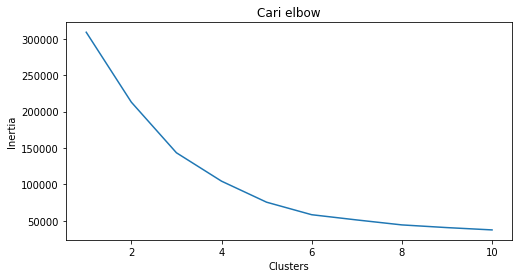

In [87]:
#membuat plot inertia
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [98]:
#membuat objek kmeans

km5 = KMeans(n_clusters=5).fit(x)

#menambahkan kolom label pada dataset

x['Labels'] = km5.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


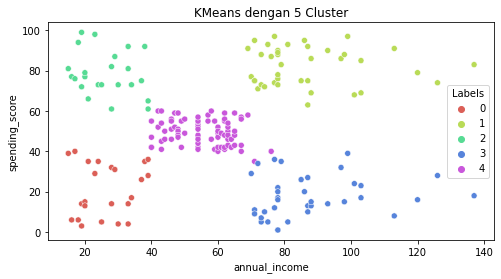

In [99]:
#membuat plot kmeans dengan 5 klaster

plt.figure(figsize=(8,4))
sns.scatterplot(x['annual_income'], x['spending_score'], hue=x['Labels'],
                palette=sns.color_palette('hls', 5))

plt.title('KMeans dengan 5 Cluster')               
plt.show()